In [1]:
# Import Libs
import calendar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Load the Data
df = pd.read_csv("acquisitions_update_2021.csv")
print("Initial columns: ", df.columns)
df.head()

Initial columns:  Index(['ID', 'Parent Company', 'Acquisition Year', 'Acquisition Month',
       'Acquired Company', 'Business', 'Country', 'Acquisition Price',
       'Category', 'Derived Products'],
      dtype='object')


,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,-,-,-,-
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,-,-,-,-
2,3,Apple,1988,Jun,Styleware,Computer software,-,-,-,-
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,-,-,-,-
4,5,Apple,1989,Jan,Coral Software,Computer software,-,-,-,-


In [5]:
#Check missing values
df.isnull().sum()

ID                   0
Parent Company       0
Acquisition Year     0
Acquisition Month    0
Acquired Company     0
Business             0
Country              0
Acquisition Price    0
Category             0
Derived Products     0
dtype: int64

In [7]:
# Create mapping for month abbreviations to numbers
month_map_abbr = {month: index for index, month in enumerate(calendar.month_abbr) if month}

# Replace non-numeric values explicitly
df['Acquisition Month'] = df['Acquisition Month'].replace('-', np.nan)

# Convert month abbreviations to numbers
df['Acquisition Month'] = df['Acquisition Month'].map(month_map_abbr)

# Fill NaN with default month (January = 1)
df['Acquisition Month'] = df['Acquisition Month'].fillna(1).astype(int)

print("\nUnique Months After Cleaning:\n", df['Acquisition Month'].unique())


Unique Months After Cleaning:
 [ 3  6  7  1  2  9 11  4  5 12 10  8]


In [25]:
#Create Acquisition Date Column
df['Acquisition Date'] = pd.to_datetime(
    df['Acquisition Year'].astype(str) + '-' + df['Acquisition Month'].astype(str),
    format='%Y-%m', errors='coerce'
)

print("\nSample of Acquisition Date:\n", df[['Acquisition Year', 'Acquisition Month', 'Acquisition Date']].sample(10))


Sample of Acquisition Date:
      Acquisition Year  Acquisition Month Acquisition Date
634              2017                  8       2017-08-01
123              2008                  7       2008-07-01
26               2008                  4       2008-04-01
401              2010                  6       2010-06-01
856              2015                  9       2015-09-01
378              2006                 10       2006-10-01
1225             2006                  4       2006-04-01
1446             2014                 10       2014-10-01
158              2014                  4       2014-04-01
569              2014                  4       2014-04-01


In [15]:
#Convert Acquisition Price to numeric
df['Acquisition Price'] = pd.to_numeric(df['Acquisition Price'], errors='coerce')

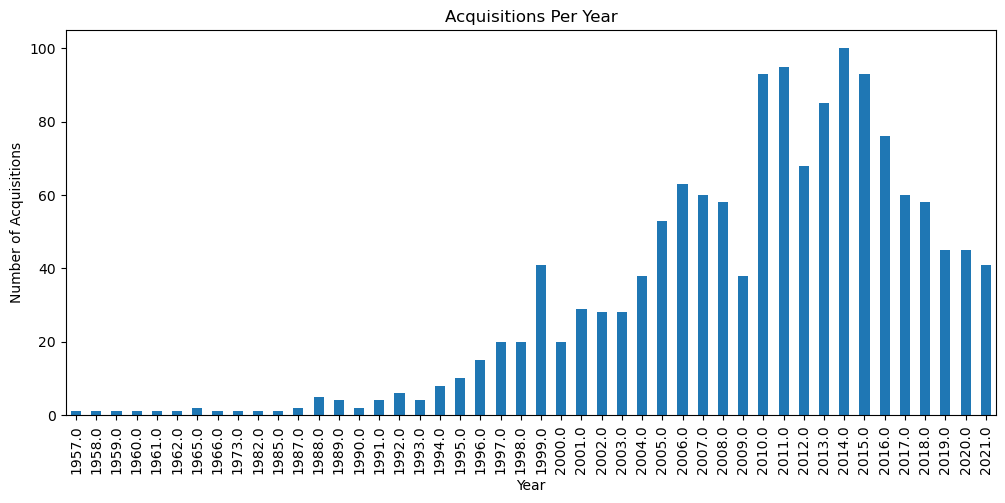

In [27]:
df['Acquisition Date'] = pd.to_datetime(df['Acquisition Date'], errors='coerce')

# Count acquisitions per year
df['Acquisition Date'].dt.year.value_counts().sort_index().plot(
    kind='bar', figsize=(12, 5), title="Acquisitions Per Year"
)
plt.xlabel("Year")
plt.ylabel("Number of Acquisitions")
plt.show()

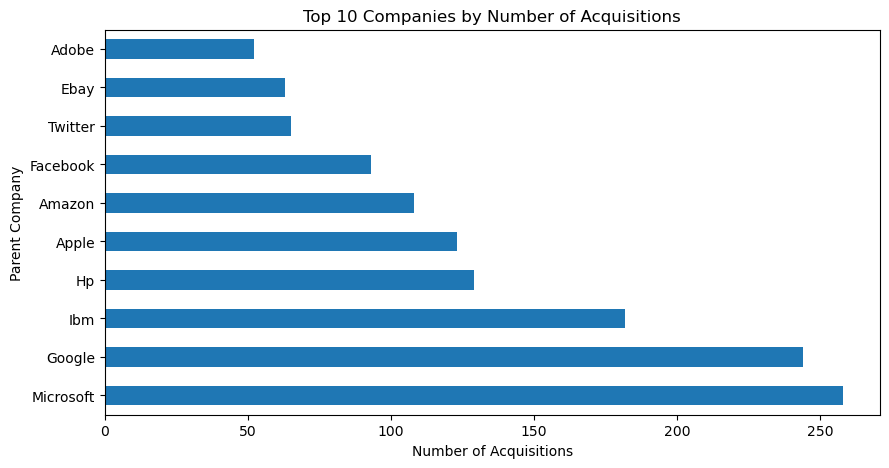

In [19]:
df['Parent Company'].value_counts().head(10).plot(
    kind='barh', figsize=(10, 5), title="Top 10 Companies by Number of Acquisitions"
)
plt.xlabel("Number of Acquisitions")
plt.show()

In [31]:
def format_price(value):
    """Convert acquisition price to human-readable format (M = million, B = billion)."""
    if pd.isna(value):  # Handle NaN values
        return "N/A"
    elif value >= 1e9:
        return f"${value / 1e9:.1f}B"  # Convert to billions
    elif value >= 1e6:
        return f"${value / 1e6:.1f}M"  # Convert to millions
    else:
        return f"${value:,.0f}"  # Show full number if less than 1 million

# Apply formatting
df['Formatted Acquisition Price'] = df['Acquisition Price'].apply(format_price)

# Display the top 10 acquisitions in human-readable format
top_acquisitions = df.nlargest(10, 'Acquisition Price')[
    ['Parent Company', 'Acquired Company', 'Formatted Acquisition Price']
]

print("\nTop 10 Most Expensive Acquisitions (Formatted):\n", top_acquisitions)


Top 10 Most Expensive Acquisitions (Formatted):
      Parent Company         Acquired Company Formatted Acquisition Price
1402         Disney         21st Century Fox                      $71.3B
168         Twitter                Periscope                      $50.1B
1190            Ibm                  Red Hat                      $34.0B
872       Microsoft                 LinkedIn                      $26.2B
350              Hp                   Compaq                      $25.0B
917       Microsoft    Nuance Communications                      $19.7B
1303       Facebook                 WhatsApp                      $19.0B
1390         Disney  Capital Cities/ABC Inc.                      $19.0B
396              Hp  Electronic Data Systems                      $13.9B
267          Amazon       Whole Foods Market                      $13.7B


In [23]:
#Save the cleaned dataset
df.to_csv("cleaned_MA_data.csv", index=False)
print("\nCleaned dataset saved successfully.")


Cleaned dataset saved successfully.
